# Assignment for the machine learning part of the Telecomunication course
- Student Name: Ali Varasteh Ranjbar 
- Strategos student
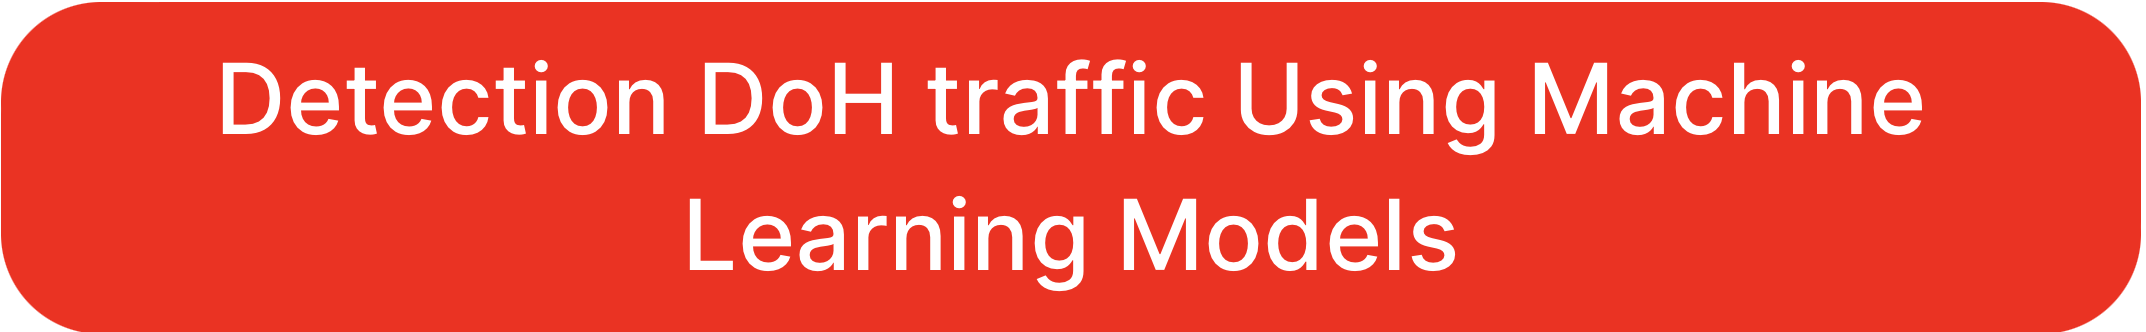

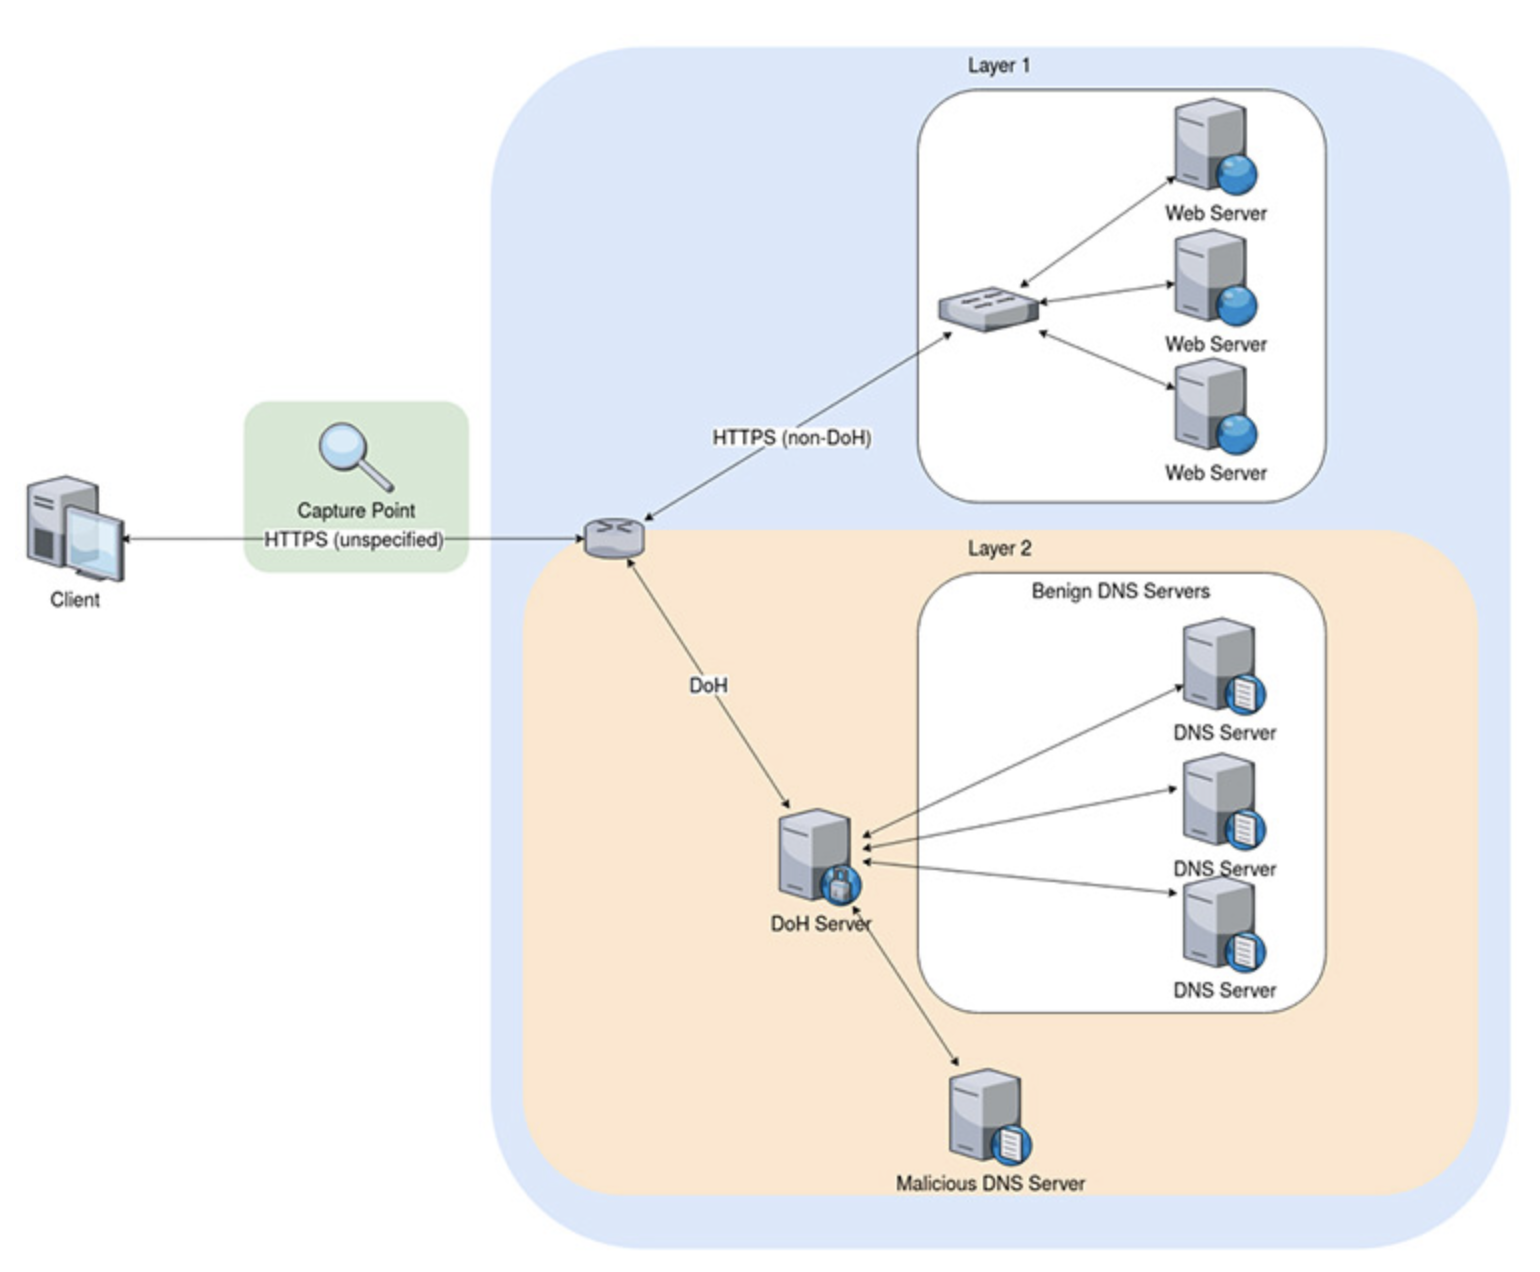

Domain Name System (DNS) is one of the early and vulnerable network protocols which has several security loopholes that have been exploited repeatedly over the years. DNS abuse has always been an area of great concern for cybersecurity researchers. However, providing security and privacy to DNS requests and responses is still a challenging task as attackers use sophisticated attack methodologies to steal data on the fly.

To overcome some of the DNS vulnerabilities related to privacy and data manipulation, IETF introduced DNS over HTTPS (DoH) in RFC8484, a protocol that enhances privacy and combats eavesdropping and man-in-the-middle attacks by encrypting DNS queries and sending them in a covert channel/tunnel so that data is not hampered on the way. Nonetheless, unavailability of a representative dataset is the key obstacle to evaluate the techniques that capture DoH traffic in a network topology.

## Importing libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules
from sklearn.inspection import permutation_importance
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import a
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

## Importing Data

In [6]:
df_benign_1 = pd.read_csv("/Users/alivarastehranjbar/Desktop/telecom/Third/archive/benign-csvs/benign-chrome.csv")
df_benign_2 = pd.read_csv("/Users/alivarastehranjbar/Desktop/telecom/Third/archive/benign-csvs/benign-firefox.csv")
df_malic_1 = pd.read_csv("/Users/alivarastehranjbar/Desktop/telecom/Third/archive/malic-csvs/mal-dns2tcp.csv")
df_malic_2 = pd.read_csv("/Users/alivarastehranjbar/Desktop/telecom/Third/archive/malic-csvs/mal-dnscat2.csv")
df_malic_3 = pd.read_csv("/Users/alivarastehranjbar/Desktop/telecom/Third/archive/malic-csvs/mal-iodine.csv")

df_benign = pd.concat([df_benign_1,df_benign_2])
df_benign['DoH'] = 0 # benign
df_benign.rename(columns={'DoH': 'labels'} ,inplace=True)

df_malic = pd.concat([df_malic_1,df_malic_2])
df_malic = pd.concat([df_malic,df_malic_3])
df_malic['DoH'] = 1 # malicious
df_malic.rename(columns={'DoH': 'labels'},inplace=True)

data = shuffle(pd.concat([df_malic,df_benign]))
data = data.dropna()
data.describe()

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,labels
count,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,...,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06,1.159241e+06
mean,4.877068e+04,3.280861e+03,2.039041e+01,1.737848e+04,9.269339e+03,5.101626e+04,2.339152e+04,3.471051e+05,3.757959e+02,2.835787e+02,...,1.020484e+00,1.507249e+00,2.442308e-01,2.564725e-01,2.120437e-01,1.108368e-01,-2.670836e+00,-1.732666e+00,8.168995e-01,2.153875e-01
std,1.456809e+04,1.155303e+04,3.445745e+01,1.005976e+05,2.449412e+05,3.570916e+05,1.646947e+05,1.094197e+06,4.537429e+02,3.023161e+02,...,5.864867e-01,1.224081e+01,1.203163e+00,1.490254e+00,1.635177e+00,1.201514e+00,4.442455e+00,4.852792e+00,1.553978e+00,4.110911e-01
min,4.430000e+02,4.430000e+02,3.000000e-06,5.400000e+01,1.047780e+00,5.400000e+01,5.163631e-01,0.000000e+00,0.000000e+00,5.466667e+01,...,2.350834e-02,0.000000e+00,0.000000e+00,2.000000e-06,2.000000e-06,-1.000000e-06,-1.000000e+01,-1.000000e+01,0.000000e+00,0.000000e+00
25%,4.388000e+04,4.430000e+02,9.289800e-02,1.780000e+02,1.178893e+02,1.510000e+02,2.557885e+02,2.145600e+02,1.464787e+01,6.771429e+01,...,5.773789e-01,0.000000e+00,0.000000e+00,1.381300e-02,1.515600e-02,2.400000e-05,-1.000000e+01,-1.000000e+01,0.000000e+00,0.000000e+00
50%,5.243400e+04,4.430000e+02,1.395299e+00,1.533000e+03,1.375764e+03,4.168000e+03,2.357311e+03,1.266689e+05,3.559057e+02,2.234000e+02,...,9.701604e-01,5.704946e-05,7.553110e-03,2.142480e-02,1.994500e-02,4.340000e-04,-1.160292e+00,8.378903e-01,5.749726e-01,0.000000e+00
75%,5.806000e+04,4.430000e+02,3.328484e+01,2.475000e+03,3.891589e+03,7.516000e+03,7.292114e+03,3.236342e+05,5.688886e+02,3.484500e+02,...,1.293604e+00,3.083009e-04,1.755850e-02,4.586822e-02,2.860000e-02,2.443600e-02,6.158118e-01,1.338023e+00,9.684560e-01,0.000000e+00
max,6.553400e+04,6.553400e+04,1.790211e+02,1.597561e+07,9.436036e+07,5.268011e+07,2.200000e+07,8.109299e+07,9.005165e+03,5.146276e+03,...,8.777577e+00,1.002920e+03,3.166891e+01,4.501364e+01,4.501364e+01,4.501364e+01,2.970716e+00,7.096569e+00,7.366547e+01,1.000000e+00


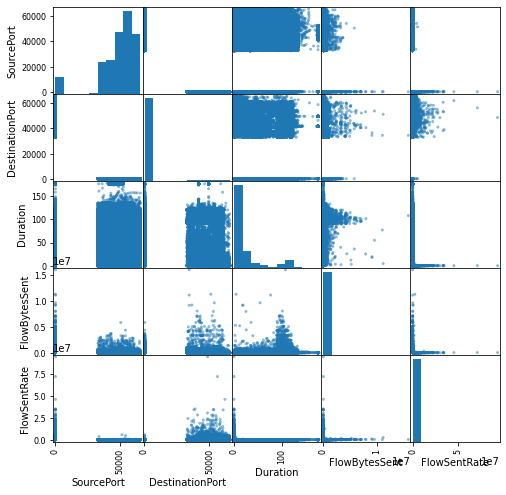

In [7]:
pd.plotting.scatter_matrix(data[data.columns[:8]], figsize=(8,8), diagonal='hist')
plt.show()

## Transforming data 

In [8]:
le=LabelEncoder()
data['SourceIP'] = le.fit_transform(data['SourceIP'])
data['DestinationIP'] = le.fit_transform(data['DestinationIP'])
data['SourcePort'] = le.fit_transform(data['SourcePort'])
data['DestinationPort'] = le.fit_transform(data['DestinationPort'])

In [21]:
def X_definer(data,n_features):
    '''this function will apply '''
    x = data.drop(["TimeStamp","labels"],axis=1)
    x = x[x.columns[:n_features]]
    Y = data['labels'].values

    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    return X, Y, x

## Defining a function to run the models

In [34]:
def func(X,Y,model,x):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=3)
    model = model
    model.fit(X_train, y_train)
    print("\n Parameters",model.get_params())
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print('\nTest Accuracy : \033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))
    print(classification_report(y_test, pred))
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    if str(model) == str(DecisionTreeClassifier()):
        feat_importances = pd.Series(model.feature_importances_, index = x.columns)
    elif str(model) == str(GaussianNB()):
        imps = permutation_importance(model, X_test, y_test)
        feat_importances = pd.Series(imps.importances_mean, index = x.columns)
    else:
        feat_importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
        feat_importances = pd.Series(feat_importances, index = x.columns)
    FI = feat_importances.sort_values(ascending = True).plot(kind = 'barh',title = model)
    plt.show()
    return acc


## Running the Models
This part will run the model with 
- GaussianNB()
- SkopeRules
[Skope-Rules](https://github.com/scikit-learn-contrib/skope-rules) is an interpretable rule-based model consisting of a series of if then rules. <br>
 The algorithm is composed of three steps:
   1. BAGGING ESTIMATOR: the algorithm trains a tree-based model predicting the target and uses it to create these decision rule.
   2. PERFORMANCE FILTERING: from this set of rules an initial screening is carried out based on precision and recall thresholds.
   3. SEMANTIC DEDUPLICATION: the last filter applied for the choice of rules is based on a criterion of similarity between terms. 
   - The measure of similarity of two rules is determined by how many terms they have in common.
- DecisionTreeClassifier \
and 8,16,24,30 number of features to test the model.

running algorithm with GaussianNB(), and 8 features

 Parameters {'priors': None, 'var_smoothing': 1e-09}

Test Accuracy :   82.09464%  
              precision    recall  f1-score   support

           0       0.85      0.94      0.89    272987
           1       0.64      0.38      0.48     74786

    accuracy                           0.82    347773
   macro avg       0.74      0.66      0.68    347773
weighted avg       0.80      0.82      0.80    347773



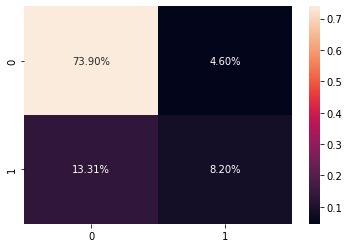

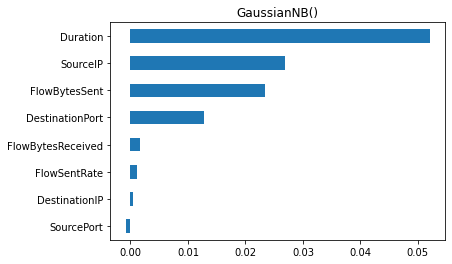

running algorithm with GaussianNB(), and 16 features

 Parameters {'priors': None, 'var_smoothing': 1e-09}

Test Accuracy :   47.90395%  
              precision    recall  f1-score   support

           0       0.98      0.34      0.51    272987
           1       0.29      0.97      0.44     74786

    accuracy                           0.48    347773
   macro avg       0.63      0.66      0.48    347773
weighted avg       0.83      0.48      0.50    347773



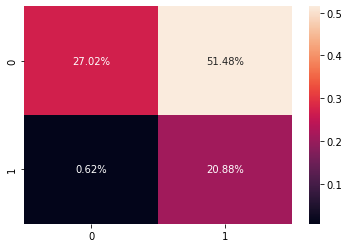

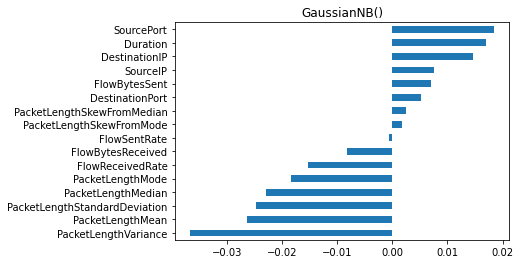

running algorithm with GaussianNB(), and 24 features

 Parameters {'priors': None, 'var_smoothing': 1e-09}

Test Accuracy :   85.32318%  
              precision    recall  f1-score   support

           0       0.98      0.83      0.90    272987
           1       0.60      0.92      0.73     74786

    accuracy                           0.85    347773
   macro avg       0.79      0.88      0.81    347773
weighted avg       0.90      0.85      0.86    347773



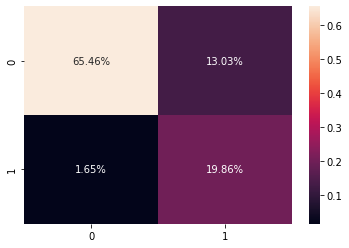

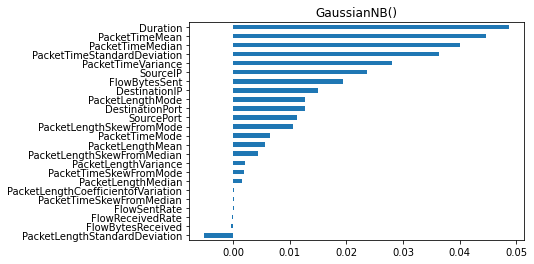

running algorithm with GaussianNB(), and 33 features

 Parameters {'priors': None, 'var_smoothing': 1e-09}

Test Accuracy :   88.82231%  
              precision    recall  f1-score   support

           0       0.96      0.89      0.93    272987
           1       0.69      0.87      0.77     74786

    accuracy                           0.89    347773
   macro avg       0.83      0.88      0.85    347773
weighted avg       0.90      0.89      0.89    347773



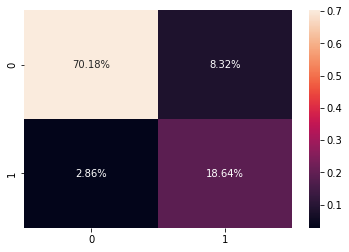

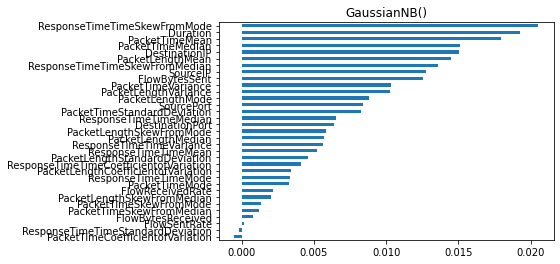

running algorithm with DecisionTreeClassifier(), and 8 features

 Parameters {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Test Accuracy :   99.98907%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272987
           1       1.00      1.00      1.00     74786

    accuracy                           1.00    347773
   macro avg       1.00      1.00      1.00    347773
weighted avg       1.00      1.00      1.00    347773



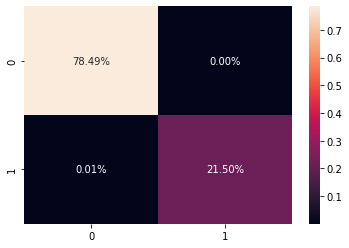

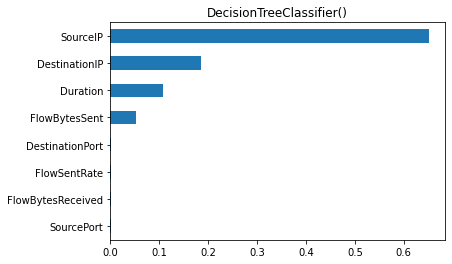

running algorithm with DecisionTreeClassifier(), and 16 features

 Parameters {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Test Accuracy :   99.99195%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272987
           1       1.00      1.00      1.00     74786

    accuracy                           1.00    347773
   macro avg       1.00      1.00      1.00    347773
weighted avg       1.00      1.00      1.00    347773



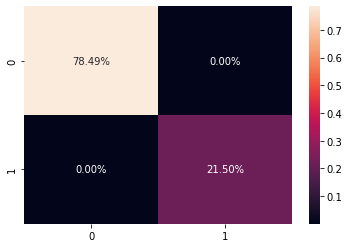

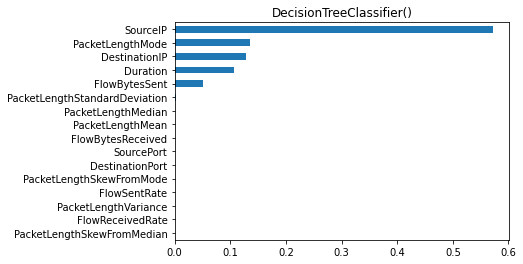

running algorithm with DecisionTreeClassifier(), and 24 features

 Parameters {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Test Accuracy :   99.98907%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272987
           1       1.00      1.00      1.00     74786

    accuracy                           1.00    347773
   macro avg       1.00      1.00      1.00    347773
weighted avg       1.00      1.00      1.00    347773



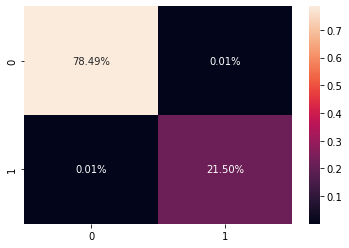

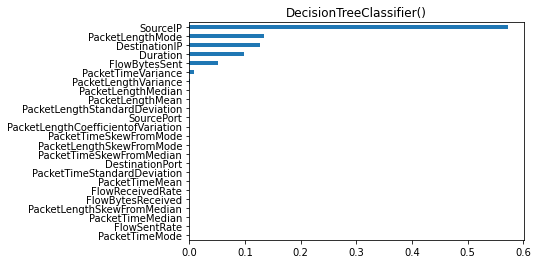

running algorithm with DecisionTreeClassifier(), and 33 features

 Parameters {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Test Accuracy :   99.98965%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272987
           1       1.00      1.00      1.00     74786

    accuracy                           1.00    347773
   macro avg       1.00      1.00      1.00    347773
weighted avg       1.00      1.00      1.00    347773



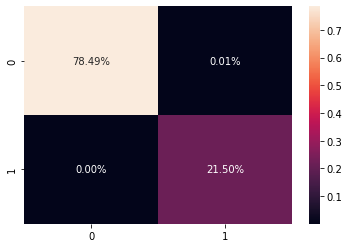

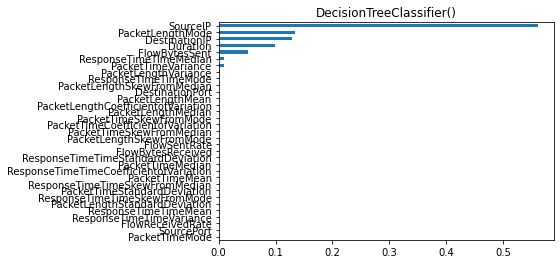

running algorithm with SkopeRules(feature_names=Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMod...
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'labels'],
      dtype='object'),
           max_depth_duplication=2, random_state=42), and 8 features

 Parameters {'bootstrap': False, 'bootstrap_features': False, 'feature_names': Index(['SourceIP', 'DestinationIP', 'S

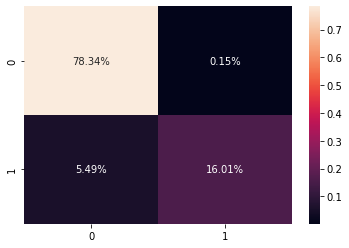

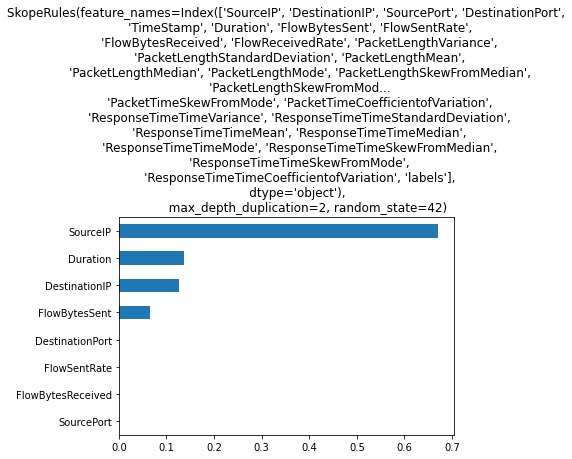

running algorithm with SkopeRules(feature_names=Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMod...
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'labels'],
      dtype='object'),
           max_depth_duplication=2, random_state=42), and 16 features

 Parameters {'bootstrap': False, 'bootstrap_features': False, 'feature_names': Index(['SourceIP', 'DestinationIP', '

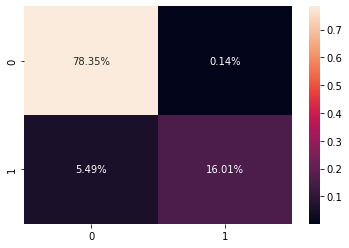

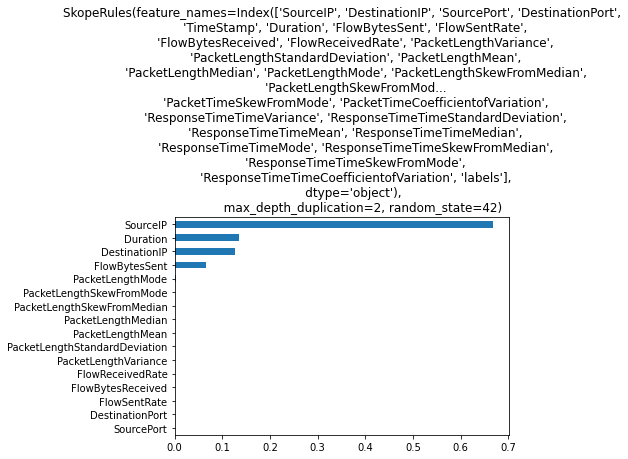

running algorithm with SkopeRules(feature_names=Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMod...
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'labels'],
      dtype='object'),
           max_depth_duplication=2, random_state=42), and 24 features

 Parameters {'bootstrap': False, 'bootstrap_features': False, 'feature_names': Index(['SourceIP', 'DestinationIP', '

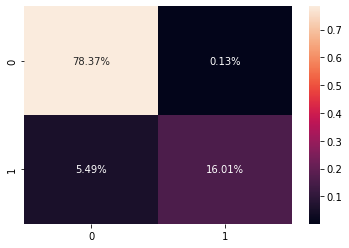

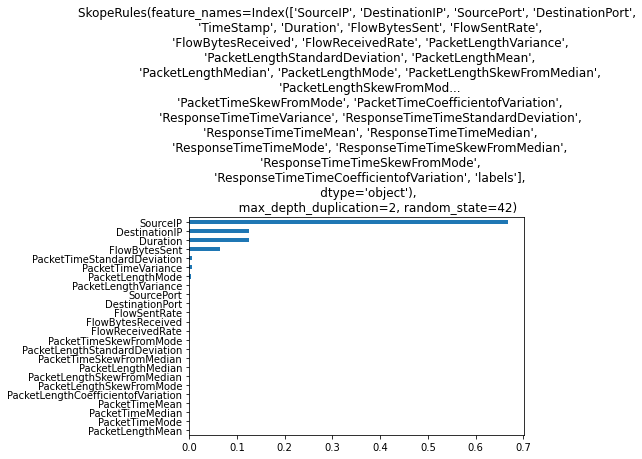

running algorithm with SkopeRules(feature_names=Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMod...
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'labels'],
      dtype='object'),
           max_depth_duplication=2, random_state=42), and 33 features

 Parameters {'bootstrap': False, 'bootstrap_features': False, 'feature_names': Index(['SourceIP', 'DestinationIP', '

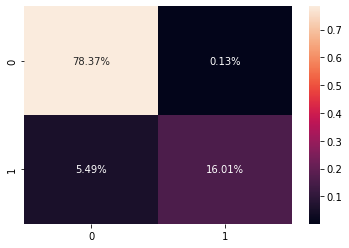

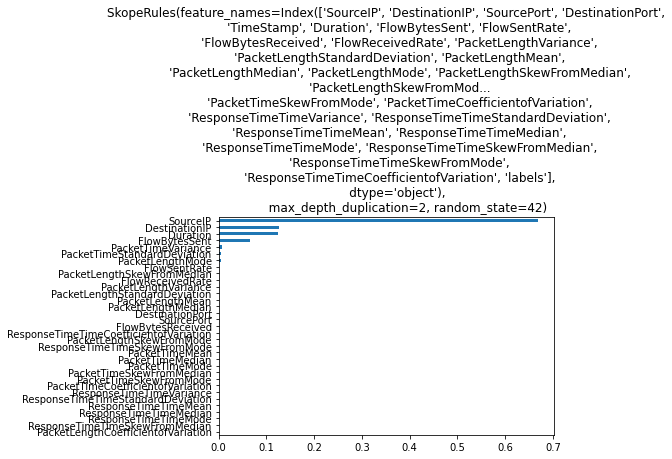

In [35]:
for i in [GaussianNB(),DecisionTreeClassifier(),SkopeRules(feature_names = data.columns, random_state = 42, max_depth_duplication = 2)]:
    # defining loop for having
    for j in [8,16,24,len(data.columns)-2]:
        print("running algorithm with {}, and {} features".format(i,j))
        X, Y ,x = X_definer(data,j)
        acc = func(X,Y,i,x)

# Descussion
- The open source dataset has been downloaded form https://www.unb.ca/cic/datasets/dohbrw-2020.html
- which is the impact of the features to the classification performance?
     <font color='red'>As we can see in the result of the running model and As a result, classification algorithms show different performance about different kind of data structures, content and context. This implies that context-aware selection of classification algorithms will be meaningful in selecting optimal algorithms.we could develop an adaptive intelligent system which is able to automatically recognize the dy- namic change of the characteristics of data set, and then change or improve the classification algorithm in an autonomous manner. For example, data imbalance may occur from a change in contex- tual. Variable factors such as time and storage also give rise to data sets that are imbalanced. This symptom used to be called extrinsic data imbalance. In other words, classification algorithms may show different performance levels according to the context. source: Effects of data set features on the performances of classification algorithms Ohbyung Kwon a,⇑, Jae Mun Sim b,1. "I should note that increasing features always does not have a good impact on learning as shown in gaussian."</font>
- What is the feature extraction process? \
    <font color='red'>Feature extraction refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set. It yields better results than applying machine learning directly to the raw data.
    Feature extraction can be accomplished manually or automatically:
    - Manual feature extraction requires identifying and describing the features that are relevant for a given problem and implementing a way to extract those features. In many situations, having a good understanding of the background or domain can help make informed decisions as to which features could be useful. Over decades of research, engineers and scientists have developed feature extraction methods for images, signals, and text. An example of a simple feature is the mean of a window in a signal.
    - Automated feature extraction uses specialized algorithms or deep networks to extract features automatically from signals or images without the need for human intervention. This technique can be very useful when you want to move quickly from raw data to developing machine learning algorithms. Wavelet scattering is an example of automated feature extraction.
    With the ascent of deep learning, feature extraction has been largely replaced by the first layers of deep networks – but mostly for image data. For signal and time-series applications, feature extraction remains the first challenge that requires significant expertise before one can build effective predictive models.</font>
- Is the Gaussian probability distribution assumption about data applicable?\
     <font color='red'>In the result of testing the dataset we can see that DecisionTreeClassifier worked better than the GaussianNB and by testing other algorithm such as KNN we can see that they will work better but we should not forget that Naive bayes (Gaussian) is one of the best distribution possiblities in machine learning and recently i hvae read an article which refered to use Gussian with SVM, and we can get better result or using other methods to improve our algorithm, such as PCA or etc.</font>